In [36]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications import EfficientNetB7, ResNet50, ResNet152
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow import convert_to_tensor
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [37]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
dataset_path = '/content/drive/MyDrive/Final exam dataset'

In [39]:
classes = os.listdir(dataset_path)
classes

['3-DF', '0-AK', '4-MEL', '1-BCC', '5-NV', '7-VASC', '6-SCC', '2-BKL']

Loading Data

In [40]:
#Image Dimensions for loading
IMAGE_WIDTH = 400
IMAGE_HEIGHT = 400

# Model Building

In [51]:
loaded_model = ResNet50(include_top=False, weights = 'imagenet', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

In [52]:
for layer in loaded_model.layers:
  layer.trainable = False

In [53]:
x = Flatten()(loaded_model.output)
x = Dense(128, activation = 'sigmoid')(x)
x = Dropout(0.2)(x)
x = Dense(len(classes), activation = 'softmax')(x)

model = Model(loaded_model.input, x)
model.compile(optimizer = Adam(0.0001, 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 406, 406, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 200, 200, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [55]:
from keras.preprocessing.image import ImageDataGenerator

In [56]:
#Basic Parameters
epochs = 30
batch_size = 32
#steps_per_epoch = len(X_train) // batch_size

In [57]:
data_gen = ImageDataGenerator(featurewise_center= True, featurewise_std_normalization= True, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True, vertical_flip = True, validation_split = 0.2)
train_gen = data_gen.flow_from_directory(dataset_path, batch_size = batch_size, target_size = (IMAGE_WIDTH, IMAGE_HEIGHT), subset='training')
validation_gen = data_gen.flow_from_directory(dataset_path, batch_size = batch_size, target_size = (IMAGE_WIDTH, IMAGE_HEIGHT), subset='validation')

Found 1123 images belonging to 8 classes.
Found 276 images belonging to 8 classes.


Training Model

In [22]:
history = model.fit(train_gen, epochs = epochs, validation_data = validation_gen)

Epoch 1/30
36/36 [==============================] - 103s 2s/step - loss: 1.9671 - accuracy: 0.2841 - val_loss: 1.6101 - val_accuracy: 0.3986
Epoch 2/30
36/36 [==============================] - 75s 2s/step - loss: 1.5664 - accuracy: 0.4310 - val_loss: 1.4241 - val_accuracy: 0.4601
Epoch 3/30
36/36 [==============================] - 77s 2s/step - loss: 1.4146 - accuracy: 0.4951 - val_loss: 1.3467 - val_accuracy: 0.5616
Epoch 4/30
36/36 [==============================] - 75s 2s/step - loss: 1.3493 - accuracy: 0.5111 - val_loss: 1.3500 - val_accuracy: 0.5145
Epoch 5/30
36/36 [==============================] - 76s 2s/step - loss: 1.2893 - accuracy: 0.5494 - val_loss: 1.3176 - val_accuracy: 0.5326
Epoch 6/30
36/36 [==============================] - 76s 2s/step - loss: 1.2321 - accuracy: 0.5833 - val_loss: 1.2196 - val_accuracy: 0.5725
Epoch 7/30
36/36 [==============================] - 75s 2s/step - loss: 1.1941 - accuracy: 0.5948 - val_loss: 1.1804 - val_accuracy: 0.5688
Epoch 8/30
36/36 [=

In [58]:
new_history = model.fit(train_gen, epochs = epochs, validation_data = validation_gen)

Epoch 1/30
36/36 [==============================] - 69s 2s/step - loss: 1.8009 - accuracy: 0.3767 - val_loss: 1.4667 - val_accuracy: 0.5000
Epoch 2/30
36/36 [==============================] - 63s 2s/step - loss: 1.3663 - accuracy: 0.5138 - val_loss: 1.3327 - val_accuracy: 0.5543
Epoch 3/30
36/36 [==============================] - 65s 2s/step - loss: 1.2113 - accuracy: 0.5824 - val_loss: 1.1796 - val_accuracy: 0.6014
Epoch 4/30
36/36 [==============================] - 64s 2s/step - loss: 1.1236 - accuracy: 0.6028 - val_loss: 1.1987 - val_accuracy: 0.5616
Epoch 5/30
36/36 [==============================] - 63s 2s/step - loss: 1.0516 - accuracy: 0.6465 - val_loss: 1.0585 - val_accuracy: 0.6558
Epoch 6/30
36/36 [==============================] - 64s 2s/step - loss: 1.0011 - accuracy: 0.6616 - val_loss: 1.0736 - val_accuracy: 0.6051
Epoch 7/30
36/36 [==============================] - 62s 2s/step - loss: 0.9445 - accuracy: 0.6981 - val_loss: 1.0434 - val_accuracy: 0.6268
Epoch 8/30
36/36 [==

In [23]:
 history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

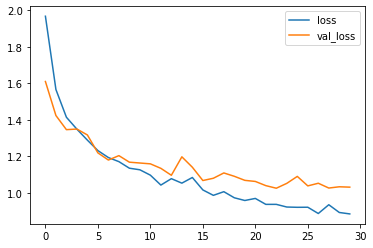

In [62]:
#Efficient Net B7
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

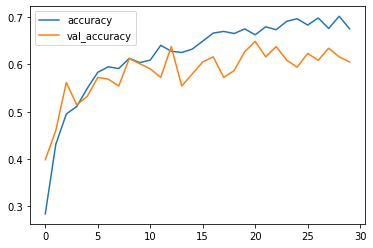

In [63]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

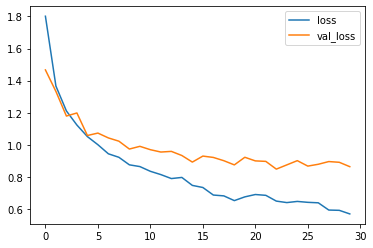

In [61]:
#Resnet 50
plt.plot(new_history.history['loss'], label='loss')
plt.plot(new_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

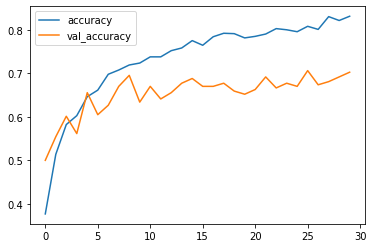

In [60]:
plt.plot(new_history.history['accuracy'], label = 'accuracy')
plt.plot(new_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [24]:
model.save("Model6.h5")

In [64]:
y_pred = model.predict(validation_gen)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/9 [==============================] - 15s 2s/step


In [65]:
y_preds = np.argmax(y_pred, axis = 1)
y_preds

array([0, 5, 0, 3, 3, 0, 5, 2, 2, 5, 4, 3, 6, 7, 6, 7, 0, 0, 2, 4, 6, 5,
       2, 1, 2, 2, 1, 6, 5, 2, 6, 7, 2, 5, 5, 2, 1, 7, 5, 0, 5, 0, 6, 2,
       6, 2, 2, 1, 5, 1, 1, 2, 5, 2, 1, 6, 2, 7, 5, 6, 2, 2, 2, 2, 7, 5,
       1, 1, 1, 5, 6, 5, 3, 5, 1, 2, 6, 1, 1, 0, 0, 5, 5, 5, 1, 5, 6, 5,
       0, 7, 5, 6, 5, 1, 6, 1, 1, 0, 0, 6, 0, 0, 2, 5, 5, 4, 2, 5, 2, 1,
       0, 5, 2, 4, 5, 6, 3, 1, 2, 1, 2, 2, 0, 1, 0, 1, 3, 5, 1, 6, 5, 7,
       5, 3, 2, 3, 0, 4, 3, 5, 6, 1, 5, 6, 2, 0, 2, 5, 7, 6, 5, 3, 2, 1,
       6, 6, 1, 4, 5, 5, 2, 3, 2, 5, 6, 7, 1, 1, 0, 5, 5, 6, 0, 7, 7, 7,
       5, 5, 6, 7, 3, 2, 7, 5, 1, 5, 5, 5, 0, 3, 4, 7, 2, 6, 1, 7, 6, 5,
       7, 2, 0, 7, 1, 5, 6, 0, 5, 3, 5, 3, 5, 5, 0, 5, 1, 0, 6, 5, 5, 3,
       1, 1, 2, 1, 5, 5, 5, 0, 1, 6, 4, 1, 7, 3, 5, 0, 6, 6, 5, 2, 6, 3,
       1, 5, 1, 7, 5, 1, 1, 5, 6, 7, 6, 4, 6, 6, 0, 1, 0, 3, 0, 7, 2, 4,
       5, 1, 2, 7, 2, 3, 1, 5, 7, 2, 5, 1])

In [66]:
labels = []
for i in range(276 // batch_size + 1):
  (x, y) = next(validation_gen)
  for j in y:
    labels.append(np.argmax(j))
labels

[5,
 4,
 6,
 2,
 7,
 2,
 7,
 0,
 1,
 1,
 4,
 5,
 7,
 2,
 3,
 6,
 1,
 4,
 4,
 3,
 4,
 5,
 6,
 0,
 5,
 2,
 7,
 6,
 0,
 1,
 2,
 7,
 0,
 5,
 3,
 4,
 0,
 1,
 0,
 5,
 4,
 2,
 5,
 5,
 1,
 5,
 0,
 0,
 5,
 1,
 4,
 4,
 4,
 1,
 6,
 1,
 4,
 7,
 2,
 1,
 2,
 0,
 0,
 6,
 3,
 4,
 6,
 2,
 2,
 2,
 5,
 6,
 6,
 5,
 6,
 2,
 5,
 2,
 5,
 0,
 3,
 3,
 5,
 7,
 4,
 6,
 6,
 5,
 6,
 3,
 5,
 2,
 6,
 7,
 1,
 5,
 6,
 6,
 4,
 0,
 5,
 6,
 0,
 6,
 0,
 0,
 1,
 7,
 4,
 1,
 7,
 2,
 1,
 5,
 0,
 2,
 3,
 6,
 1,
 7,
 6,
 3,
 7,
 2,
 7,
 5,
 0,
 3,
 5,
 6,
 2,
 6,
 2,
 0,
 5,
 1,
 7,
 4,
 7,
 1,
 4,
 1,
 2,
 5,
 1,
 5,
 1,
 0,
 4,
 4,
 4,
 5,
 7,
 4,
 0,
 1,
 4,
 2,
 4,
 1,
 2,
 5,
 5,
 6,
 7,
 4,
 1,
 3,
 2,
 0,
 6,
 0,
 7,
 7,
 1,
 1,
 7,
 1,
 2,
 5,
 1,
 0,
 5,
 2,
 1,
 0,
 6,
 2,
 7,
 1,
 0,
 0,
 4,
 1,
 5,
 5,
 2,
 0,
 0,
 4,
 5,
 0,
 6,
 5,
 0,
 4,
 4,
 6,
 4,
 3,
 3,
 4,
 6,
 1,
 1,
 3,
 4,
 5,
 1,
 0,
 1,
 6,
 0,
 1,
 5,
 2,
 1,
 2,
 7,
 3,
 6,
 0,
 3,
 6,
 2,
 7,
 1,
 6,
 0,
 1,
 4,
 0,
 5,
 1,
 2,
 3,
 0,
 1,
 5,
 0,


In [67]:
len(labels)

276

In [68]:
cm = confusion_matrix(labels, y_preds)
cm

array([[ 1,  5,  8,  4,  2, 11,  5,  3],
       [ 1,  9,  9,  3,  0,  8,  7,  3],
       [ 5,  7,  5,  1,  2, 12,  7,  2],
       [ 2,  1,  2,  2,  2,  4,  2,  4],
       [ 3,  5,  8,  1,  2,  9,  5,  2],
       [ 5,  7,  6,  4,  1, 11,  4,  4],
       [ 6,  7,  3,  3,  1,  7,  4,  4],
       [ 8,  4,  1,  2,  0,  4,  3,  3]])

In [69]:
import seaborn as sns

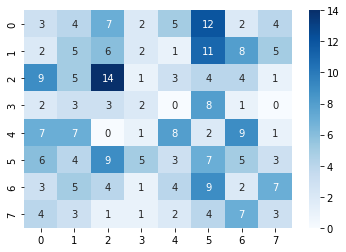

In [31]:
#Efficient Net
sns.heatmap(cm, annot=True, cmap='Blues')

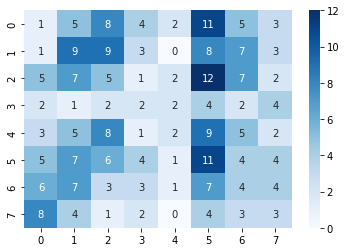

In [70]:
#Res Net
sns.heatmap(cm, annot = True, cmap = 'Blues')